**导入基础包**

In [11]:
#packages
import pandas as pd
import numpy as np

from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**读取数据**

In [12]:
df = pd.read_csv('data_features_Phylums.csv') 

In [14]:
df.head()

,Unnamed: 0,Sample ID,Sampling month average,Sampling month,SRTd,COD,NH4N,TP,Proteobacteria,Bacteroidota,...,Actinobacteriota,Acidobacteriota,Desulfobacterota,Dependentiae,Cyanobacteria,Spirochaetota,Nanoarchaeota,Elusimicrobiota,SAR324 clade(Marine group B),Armatimonadota
0,0,SAKR1,18.0,55.0,12.0,771.97,61.4,7.2,40.320312,29.988281,...,0.308594,3.945312,0.320312,0.175781,0.156250,0.160156,0.023438,0.652344,1.351562,0.738281
1,1,SAKR2,18.0,55.0,12.0,771.97,61.4,7.2,37.351562,31.402344,...,0.417969,4.082031,0.347656,0.191406,0.117188,0.187500,0.000000,0.554688,1.605469,1.031250
2,2,SAKR3,18.0,55.0,12.0,771.97,61.4,7.2,35.941406,33.183594,...,0.484375,4.027344,0.292969,0.222656,0.121094,0.175781,0.011719,0.578125,1.593750,0.828125
3,3,SAKR4,18.0,55.0,12.0,771.97,61.4,7.2,39.359375,30.535156,...,0.394531,4.113281,0.363281,0.207031,0.109375,0.191406,0.027344,0.671875,1.234375,0.875000
4,4,SAKR5,18.0,55.0,12.0,771.97,61.4,7.2,35.074219,33.347656,...,0.363281,4.449219,0.269531,0.253906,0.117188,0.250000,0.015625,0.628906,1.546875,0.882812


In [15]:
df.shape

(1186, 29)

In [16]:
df.columns

Index(['Unnamed: 0', 'Sample ID', 'Sampling month average', 'Sampling month',
       'SRTd', 'COD', 'NH4N', 'TP', 'Proteobacteria', 'Bacteroidota',
       'Patescibacteria', 'Unclassified', 'Firmicutes', 'Planctomycetota',
       'Verrucomicrobiota', 'Chloroflexi', 'Myxococcota', 'Others',
       'Bdellovibrionota', 'Actinobacteriota', 'Acidobacteriota',
       'Desulfobacterota', 'Dependentiae', 'Cyanobacteria', 'Spirochaetota',
       'Nanoarchaeota', 'Elusimicrobiota', 'SAR324 clade(Marine group B)',
       'Armatimonadota'],
      dtype='object')

In [17]:
features = ['Sampling month average', 'Sampling month','SRTd', 'COD', 'NH4N', 'TP']
targets = ['Proteobacteria', 'Bacteroidota','Patescibacteria', 'Unclassified', 'Firmicutes', 'Planctomycetota','Verrucomicrobiota', 
           'Chloroflexi', 'Myxococcota', 'Others','Bdellovibrionota', 'Actinobacteriota', 'Acidobacteriota','Desulfobacterota', 
           'Dependentiae', 'Cyanobacteria', 'Spirochaetota','Nanoarchaeota', 'Elusimicrobiota', 
           'SAR324 clade(Marine group B)','Armatimonadota']

**简单的EDA**

In [18]:
df.isnull().sum()

Unnamed: 0                        0
Sample ID                         0
Sampling month average          132
Sampling month                   23
SRTd                            342
COD                             577
NH4N                            430
TP                              583
Proteobacteria                    0
Bacteroidota                      0
Patescibacteria                   0
Unclassified                      0
Firmicutes                        0
Planctomycetota                   0
Verrucomicrobiota                 0
Chloroflexi                       0
Myxococcota                       0
Others                            0
Bdellovibrionota                  0
Actinobacteriota                  0
Acidobacteriota                   0
Desulfobacterota                  0
Dependentiae                      0
Cyanobacteria                     0
Spirochaetota                     0
Nanoarchaeota                     0
Elusimicrobiota                   0
SAR324 clade(Marine group B)

我们看到预测目标里面没有NA， 不过features里面有NA. 

部分features的空值较多，还不能直接drop. 

考虑给空值部分填充均值。

分拆数据

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


在train data 部分曲均值

In [21]:
train_data[features].mean()

Sampling month average     23.154379
Sampling month            115.381081
SRTd                       15.258321
COD                       430.108594
NH4N                       26.645109
TP                          6.274391
dtype: float64

用这部均值填充NA数据

In [22]:
df['Sampling month average'].fillna(23.154379, inplace = True)
df['Sampling month'].fillna(115.381081, inplace = True)
df['SRTd'].fillna(15.258321, inplace = True)
df['COD'].fillna(430.108594, inplace = True)
df['NH4N'].fillna(26.645109, inplace = True)
df['TP'].fillna(6.274391, inplace = True)

检查NA

In [23]:
df.isnull().sum()

Unnamed: 0                      0
Sample ID                       0
Sampling month average          0
Sampling month                  0
SRTd                            0
COD                             0
NH4N                            0
TP                              0
Proteobacteria                  0
Bacteroidota                    0
Patescibacteria                 0
Unclassified                    0
Firmicutes                      0
Planctomycetota                 0
Verrucomicrobiota               0
Chloroflexi                     0
Myxococcota                     0
Others                          0
Bdellovibrionota                0
Actinobacteriota                0
Acidobacteriota                 0
Desulfobacterota                0
Dependentiae                    0
Cyanobacteria                   0
Spirochaetota                   0
Nanoarchaeota                   0
Elusimicrobiota                 0
SAR324 clade(Marine group B)    0
Armatimonadota                  0
dtype: int64

重定义训练和测试集

In [24]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


**线性回归**

In [25]:
from sklearn import linear_model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge #导入岭回归模型

In [26]:
X_train = train_data[features]
y_train = train_data[targets]
X_test = test_data[features]
y_test = test_data[targets]

In [27]:
ridge = Ridge() #调整训练数据

In [28]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ridge)
])

训练模型

In [29]:
model.fit(X_train, y_train)
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.1182


利用训练好的模型做测试

In [30]:
y_preds = model.predict(X_test)

In [31]:
y_preds

array([[39.12012653, 30.41808314,  1.89157258, ...,  0.2238304 ,
         0.25260976,  0.29302111],
       [38.53664831, 31.85604221,  2.12839983, ...,  0.22471514,
         0.33988332,  0.32375379],
       [38.53664831, 31.85604221,  2.12839983, ...,  0.22471514,
         0.33988332,  0.32375379],
       ...,
       [40.50097832, 29.94357062,  1.84037398, ...,  0.19821382,
         0.24360218,  0.26221893],
       [40.50097832, 29.94357062,  1.84037398, ...,  0.19821382,
         0.24360218,  0.26221893],
       [40.50097832, 29.94357062,  1.84037398, ...,  0.19821382,
         0.24360218,  0.26221893]])

**结果可视化**

展示第一个ID的预测结果。

In [32]:
y_preds[0]

array([39.12012653, 30.41808314,  1.89157258,  0.88817307,  1.57071296,
        2.1100138 ,  1.80877957,  3.67979565,  5.48659183,  3.9636519 ,
        1.0517112 ,  2.74781171,  2.7438822 ,  0.56640212,  0.17366553,
        0.41084564,  0.54185922,  0.05686007,  0.2238304 ,  0.25260976,
        0.29302111])

In [33]:
y_test.iloc[0].tolist()

[36.31640625,
 19.61328125,
 2.0703125,
 0.828125,
 0.70703125,
 3.0,
 2.27734375,
 5.046875,
 12.75,
 3.1875,
 1.03125,
 7.765625,
 3.203125,
 0.43359375,
 0.0625,
 0.21484375,
 0.37109375,
 0.04296875,
 0.37109375,
 0.3984375,
 0.30859375]

In [34]:
c = {"classes":targets,
     "predictions":y_preds[0],
    "real":y_test.iloc[0].tolist() }

In [35]:
com = pd.DataFrame(c)
com = com.set_index('classes')
com

,predictions,real
classes,,
Proteobacteria,39.120127,36.316406
Bacteroidota,30.418083,19.613281
Patescibacteria,1.891573,2.070312
Unclassified,0.888173,0.828125
Firmicutes,1.570713,0.707031
Planctomycetota,2.110014,3.000000
Verrucomicrobiota,1.808780,2.277344
Chloroflexi,3.679796,5.046875
Myxococcota,5.486592,12.750000


预测和实际结果的柱状图对比

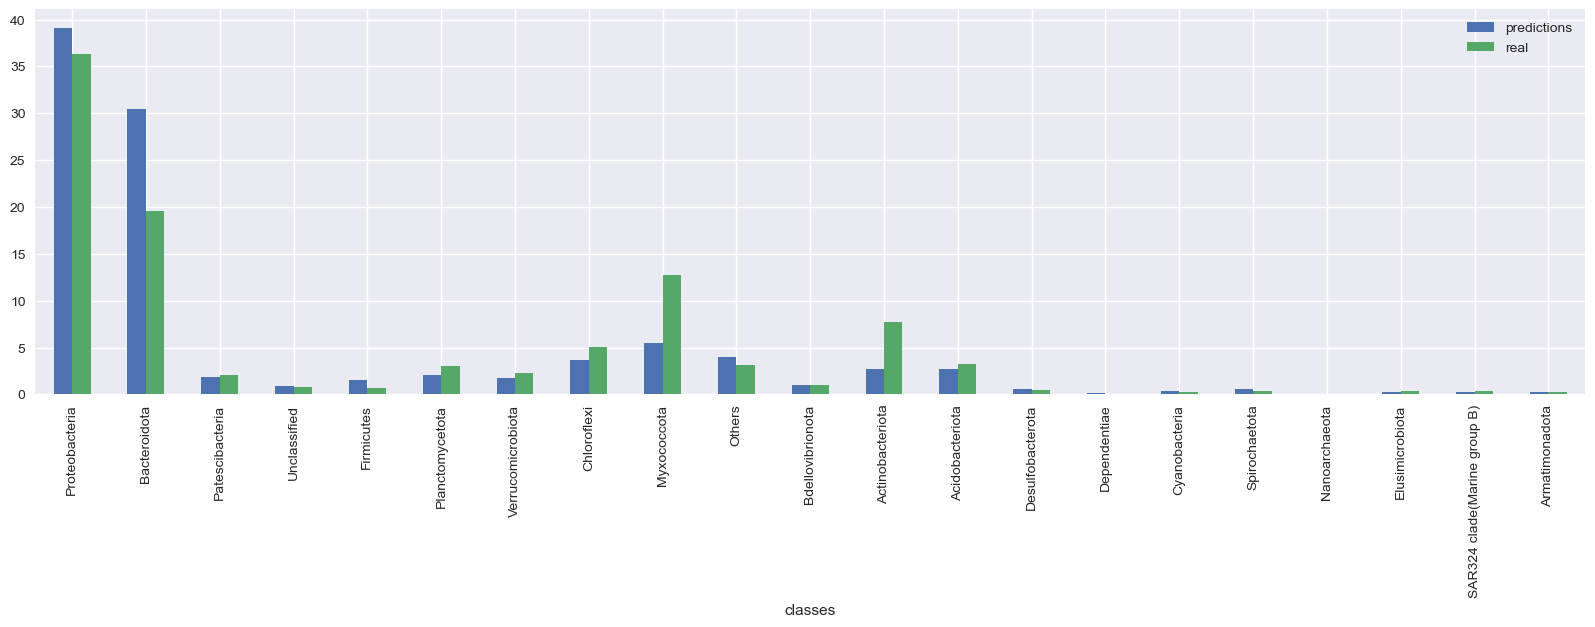

In [36]:
com.plot(kind='bar',figsize=(20,5));

预测和实际结果的散点图对比。

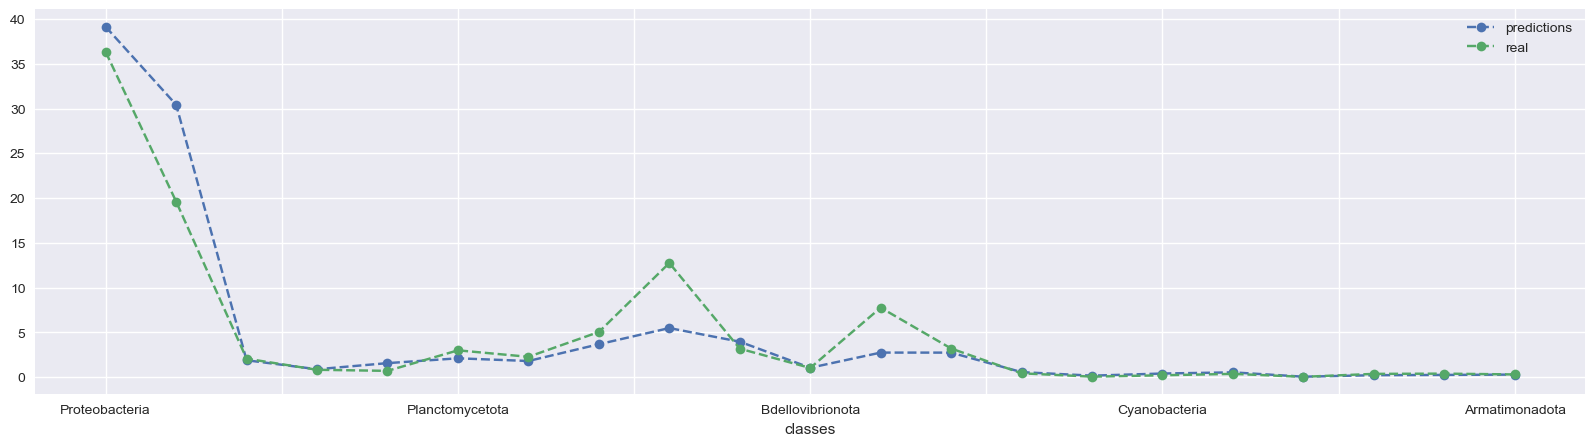

In [37]:
com.plot(kind='line',style='--o',figsize=(20,5));

上面是第一个预测结果和实际结果的对比，修改参数可以对比其他列。也可以汇总对比均值。

**模型评估**

训练集部分

R^2

In [38]:
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.1182


训练集的MSE

In [39]:
from sklearn import metrics

In [40]:
y_preds2 = model.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

10.154218905475123

测试集部分

In [41]:
MSE = metrics.mean_squared_error(y_test, y_preds)
MSE

18.90274567615173

In [42]:
RMSE = metrics.mean_squared_error(y_test, y_preds)**0.5
RMSE

4.347728795147155

In [43]:
MAE = metrics.mean_absolute_error(y_test, y_preds)
MAE

1.746242053436481

In [44]:
MAPE = metrics.mean_absolute_percentage_error(y_test, y_preds)
MAPE

32287881209010.56

# 调参和优化

In [45]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

In [46]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [47]:
# Get parameters list
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('regressor', Ridge())],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': Ridge(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__alpha': 1.0,
 'regressor__copy_X': True,
 'regressor__fit_intercept': True,
 'regressor__max_iter': None,
 'regressor__normalize': 'deprecated',
 'regressor__positive': False,
 'regressor__random_state': None,
 'regressor__solver': 'auto',
 'regressor__tol': 0.001}

In [48]:
# Perform Gridsearch and fit
param_grid = {"regressor__alpha": [0.001,0.01,0.1,1,5,10,50,100,500,1000,5000,10000,]}

In [49]:
gs = GridSearchCV(model, param_grid, n_jobs=-1, cv=tscv, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1, 5, 10, 50,
                                              100, 500, 1000, 5000, 10000]},
             verbose=1)

In [50]:
# Best Estimator
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Ridge(alpha=5000))])

In [51]:
print(f'R^2 Train: {gs.score(X_train, y_train):0.4}')

R^2 Train: 0.03718


调参后的R2变得更小了。

In [52]:
y_preds1 = gs.predict(X_test)

In [53]:
MSE = metrics.mean_squared_error(y_test, y_preds1)
MSE

16.6498973791853

调参后的MSE 也变得更小了，相比之前。所以针对这个线性回归，我们采用调参后的参数。

作为对比，我们打印训练集的MSE，看看差距大不大。

In [54]:
y_preds2 = gs.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

11.413470893169727